# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

# Introduction

In the rapidly evolving telecommunications industry, companies like Megaline are constantly striving to optimize their services and marketing strategies to meet the dynamic needs of their customers. 

As an analyst at Megaline, I have been tasked with conducting a preliminary analysis of the company's two prepaid plans, Surf and Ultimate, to determine which plan generates more revenue. 

The findings of this analysis will enable the commercial department to make informed decisions regarding the allocation of the advertising budget.

## Objective

The primary objective is to evaluate how much revenue is generated by the two prepaid plans by examining key datpoints about the customers such as their preferences and communication patterns. This analysis will serve as a foundation for making data-driven decisions on advertising budget adjustments to maximize profitability.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import markdown as m

## Load data

In [2]:
# Load the data files into different DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

# Prepare the data

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for plans
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Inside of the plans dataframe there aren't any missing values or irregularities in the data. There are only two plans that we need to consider.

## Users

In [5]:
# Print the general/summary information about the users' DataFrame
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [7]:
users[users['churn_date'].notna()].head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
12,1012,Jonelle,Mcbride,59,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-06-28,surf,2018-11-16
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07
40,1040,Paris,Santos,72,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-12-23,surf,2018-12-30
50,1050,Jone,Owen,23,"Miami-Fort Lauderdale-West Palm Beach, FL MSA",2018-03-20,ultimate,2018-10-07


In [8]:
# Print a sample of data for users
users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
449,1449,Boyd,Kelley,39,"Seattle-Tacoma-Bellevue, WA MSA",2018-10-04,surf,NaN
215,1215,Adelle,Knapp,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-01,surf,NaN
262,1262,Michelina,Hamilton,34,"Dallas-Fort Worth-Arlington, TX MSA",2018-02-09,surf,NaN
490,1490,Shane,Cortez,42,"Sacramento–Roseville–Folsom, CA MSA",2018-01-20,ultimate,NaN
165,1165,Nigel,Huber,20,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-10-27,surf,NaN


We have null vales in the churn date column. Cannot be filled if the customer is active.

### Fix Data

Firstly. we'll fix the date types by converting the reg date and churn date.

In [9]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['year'] = users['reg_date'].dt.year

In [10]:
# Check that data comes from 1 year. Then we can decide whether to aggregate by 1 month.
users['year'].unique()

array([2018])

In [11]:
users['month'] = users['reg_date'].dt.month

In [12]:
# force the change through as we have a lot of nan's here.
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d', errors='coerce')

In [13]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
 8   year        500 non-null    int64         
 9   month       500 non-null    int64         
dtypes: datetime64[ns](2), int64(4), object(4)
memory usage: 39.2+ KB


### Enrich Data

We'll make an age category to help us later on when we're analysing trends.

In [14]:
users['age'].describe()

count    500.000000
mean      45.486000
std       16.972269
min       18.000000
25%       30.000000
50%       46.000000
75%       61.000000
max       75.000000
Name: age, dtype: float64

In [15]:
def age_category(age):
    if age < 30:
        return 'under 30'
    if age < 50:
        return '30 to 50'
    if age < 70:
        return '50 to 70'
    else: 
        return 'over 70'
    
users['age_category'] = users['age'].apply(age_category)

In [16]:
users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,year,month,age_category
482,1482,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-01,ultimate,NaT,2018,1,over 70
30,1030,Chase,Kane,30,"Chicago-Naperville-Elgin, IL-IN-WI MSA",2018-02-14,ultimate,NaT,2018,2,30 to 50
63,1063,Larhonda,Hartman,60,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-05,ultimate,NaT,2018,11,50 to 70
212,1212,Alfredo,Pruitt,36,"Austin-Round Rock-Georgetown, TX MSA",2018-07-27,surf,NaT,2018,7,30 to 50
259,1259,Etsuko,Perry,63,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA",2018-03-16,surf,NaT,2018,3,50 to 70


In [17]:
# Check that the category adds up and is filled correctly.
group = users.groupby('age_category')['age'].agg(['min','max', 'median','size'])
print(group)

              min  max  median  size
age_category                        
30 to 50       30   49    39.0   166
50 to 70       50   69    60.0   169
over 70        70   75    72.0    45
under 30       18   29    23.5   120


In [18]:
# Adding a column for the state.
users[['city', 'region']] = users['city'].str.split(', ', expand=True)

In [19]:
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,year,month,age_category,region
0,1000,Anamaria,Bauer,45,Atlanta-Sandy Springs-Roswell,2018-12-24,ultimate,NaT,2018,12,30 to 50,GA MSA
1,1001,Mickey,Wilkerson,28,Seattle-Tacoma-Bellevue,2018-08-13,surf,NaT,2018,8,under 30,WA MSA
2,1002,Carlee,Hoffman,36,Las Vegas-Henderson-Paradise,2018-10-21,surf,NaT,2018,10,30 to 50,NV MSA
3,1003,Reynaldo,Jenkins,52,Tulsa,2018-01-28,surf,NaT,2018,1,50 to 70,OK MSA
4,1004,Leonila,Thompson,40,Seattle-Tacoma-Bellevue,2018-05-23,surf,NaT,2018,5,30 to 50,WA MSA


## Calls

In [20]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [21]:
# Print a sample of data for calls
calls.sample(10)

,id,user_id,call_date,duration
133996,1488_71,1488,2018-08-31,1.98
25788,1099_108,1099,2018-11-23,0.00
113999,1400_341,1400,2018-05-11,2.50
114804,1402_50,1402,2018-11-11,1.25
108497,1383_30,1383,2018-11-02,6.98
134798,1489_126,1489,2018-12-09,6.59
17170,1066_276,1066,2018-04-24,0.38
108221,1382_1413,1382,2018-08-24,0.00
98854,1354_283,1354,2018-09-28,2.93
95575,1338_400,1338,2018-08-22,2.25


### Fix & Enrich data

Fix the data types inside of the call date and duration columns.

In [22]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['duration'] = pd.to_timedelta(calls['duration'], unit='minutes')
calls['total_minutes'] = calls['duration'].dt.total_seconds() / 60
calls['call_year'] = calls['call_date'].dt.year
calls['month'] = calls['call_date'].dt.month

In [23]:
calls.head()

,id,user_id,call_date,duration,total_minutes,call_year,month
0,1000_93,1000,2018-12-27,0 days 00:08:31.200000,8.52,2018,12
1,1000_145,1000,2018-12-27,0 days 00:13:39.600000,13.66,2018,12
2,1000_247,1000,2018-12-27,0 days 00:14:28.800000,14.48,2018,12
3,1000_309,1000,2018-12-28,0 days 00:05:45.600000,5.76,2018,12
4,1000_380,1000,2018-12-30,0 days 00:04:13.200000,4.22,2018,12


In [24]:
calls['total_minutes'] = np.ceil(calls['total_minutes']).astype('int')

In [25]:
calls.head()

,id,user_id,call_date,duration,total_minutes,call_year,month
0,1000_93,1000,2018-12-27,0 days 00:08:31.200000,9,2018,12
1,1000_145,1000,2018-12-27,0 days 00:13:39.600000,14,2018,12
2,1000_247,1000,2018-12-27,0 days 00:14:28.800000,15,2018,12
3,1000_309,1000,2018-12-28,0 days 00:05:45.600000,6,2018,12
4,1000_380,1000,2018-12-30,0 days 00:04:13.200000,5,2018,12


## Messages

In [26]:
# Print the general/summary information about the messages' DataFrame
print(messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [27]:
# Print a sample of data for messages
messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


Inside this data frame, the message date needs to be formated correctly.

### Fix data

In [28]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d') 
messages['month'] = messages['message_date'].dt.month 

In [29]:
print(messages.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB
None


## Internet

In [30]:
# Print the general/summary information about the internet DataFrame
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [31]:
internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [32]:
# Print a sample of data for the internet traffic
internet.sample(5)

,id,user_id,session_date,mb_used
2722,1012_52,1012,2018-11-15,300.27
93142,1434_391,1434,2018-07-01,0.00
10381,1053_450,1053,2018-10-06,272.61
75250,1354_111,1354,2018-08-29,417.44
18283,1081_358,1081,2018-12-18,0.00


We have a good dataframe that can be merged to the users table to help up calculate the average data used per person per month. In this dataset, we will also convert the date to the correct format. After we will convert megabytes to gigabytes.

### Fix & Enrich data

Fix the date format and add converty mb_used to gb_used.

In [33]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d') 
internet['month'] = internet['session_date'].dt.month

In [34]:
internet['gb_used'] = internet['mb_used'] / 1024 

In [35]:
internet.sample(5)

,id,user_id,session_date,mb_used,month,gb_used
99958,1474_33,1474,2018-08-29,754.08,8,0.736406
75569,1356_17,1356,2018-11-04,1088.19,11,1.062686
66672,1311_446,1311,2018-08-09,500.73,8,0.488994
30552,1140_95,1140,2018-07-25,254.06,7,0.248105
14355,1066_248,1066,2018-09-13,98.16,9,0.095859


## Study plan conditions

In [36]:
# Print out the plan conditions and make sure they are clear for you
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

Now we will look at see how our different products perform.

In [37]:
calls.columns

Index(['id', 'user_id', 'call_date', 'duration', 'total_minutes', 'call_year',
       'month'],
      dtype='object')

In [38]:
users.columns

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date', 'year', 'month', 'age_category', 'region'],
      dtype='object')

In [39]:
messages.columns

Index(['id', 'user_id', 'message_date', 'month'], dtype='object')

In [40]:
internet.columns

Index(['id', 'user_id', 'session_date', 'mb_used', 'month', 'gb_used'], dtype='object')

In [41]:
plans.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name'],
      dtype='object')

In [42]:
# Calculate the amount of minutes spent by each user per month. Save the result.
calls_grouped = pd.pivot_table(calls, index=['user_id', 'month'], values='total_minutes', aggfunc='sum')
calls_grouped.columns = ['minutes']
calls_grouped.sort_values(by='minutes', ascending=False).head(5)

,,minutes
user_id,month,
1267,12,1511
1329,12,1370
1365,12,1357
1324,11,1305
1382,12,1295


In [43]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_grouped = pd.pivot_table(messages, index=['user_id', 'month'], values='id', aggfunc='count')
messages_grouped.columns = ['messages']
messages_grouped.sort_values(by='messages', ascending=False).head(5)

messages
user_id month          
1052    12          266
1381    10          224
        11          180
1328    12          168
1132    11          166

In [44]:
# Calculate total data per pe month
internet_grouped = pd.pivot_table(internet, index=['user_id', 'month'], values='mb_used', aggfunc='sum')
internet_grouped.columns = ['mb_used']
internet_grouped['mb_used'] = round(internet_grouped['mb_used']).astype('int')
internet_grouped.head()

mb_used
user_id month         
1000    12        1901
1001    8         6919
        9        13315
        10       22330
        11       18504

In [45]:
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [46]:
merg1= pd.merge(left = calls_grouped, 
                right = messages_grouped, how='outer',on=['user_id', 'month']).fillna(0)
merg2 =pd.merge(left = merg1 , 
                right = internet_grouped, how='outer',on=['user_id', 'month']).fillna(0)
merg3 = pd.merge(left = merg2, 
                 right = users[['user_id','month','plan','city','region']], on=['user_id'], how='outer')
# Add the plan information
df_merge = pd.merge(merg3, plans, left_on='plan', right_on='plan_name', how='inner')

In [47]:
# create the gb columns so we can calculate
df_merge['gb_used'] = df_merge['mb_used'] / 1024
df_merge['gb_inc'] = df_merge['mb_per_month_included'] / 1024

In [48]:
df_merge['messages'] = df_merge['messages'].fillna(0)
df_merge['minutes'] = df_merge['minutes'].fillna(0)
df_merge['mb_used'] = df_merge['mb_used'].fillna(0)
df_merge['gb_used'] = df_merge['gb_used'].fillna(0)
df_merge.isna().mean()

user_id                  0.0
minutes                  0.0
messages                 0.0
mb_used                  0.0
month                    0.0
plan                     0.0
city                     0.0
region                   0.0
messages_included        0.0
mb_per_month_included    0.0
minutes_included         0.0
usd_monthly_pay          0.0
usd_per_gb               0.0
usd_per_message          0.0
usd_per_minute           0.0
plan_name                0.0
gb_used                  0.0
gb_inc                   0.0
dtype: float64

In [49]:
print(df_merge.columns)

Index(['user_id', 'minutes', 'messages', 'mb_used', 'month', 'plan', 'city',
       'region', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute', 'plan_name', 'gb_used', 'gb_inc'],
      dtype='object')


In [50]:
df_merge = df_merge.drop(columns=['plan_name'])

In [51]:
df_merge.sample(5)

,user_id,minutes,messages,mb_used,month,plan,city,region,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,gb_inc
807,1034,7.0,4.0,997.0,8,surf,New York-Newark-Jersey City,NY-NJ-PA MSA,50,15360,500,20,10,0.03,0.03,0.973633,15.0
1850,1353,98.0,0.0,4799.0,3,surf,North Port-Sarasota-Bradenton,FL MSA,50,15360,500,20,10,0.03,0.03,4.686523,15.0
2090,1425,257.0,11.0,18266.0,9,surf,Las Vegas-Henderson-Paradise,NV MSA,50,15360,500,20,10,0.03,0.03,17.837891,15.0
2213,1485,329.0,24.0,19485.0,8,surf,Nashville-Davidson–Murfreesboro–Franklin,TN MSA,50,15360,500,20,10,0.03,0.03,19.028320,15.0
2203,1483,112.0,0.0,317.0,4,surf,Chicago-Naperville-Elgin,IL-IN-WI MSA,50,15360,500,20,10,0.03,0.03,0.309570,15.0


In [52]:
df_merge.columns

Index(['user_id', 'minutes', 'messages', 'mb_used', 'month', 'plan', 'city',
       'region', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute', 'gb_used', 'gb_inc'],
      dtype='object')

# Calculate Revenue

In [53]:
def calculate_revenue(minutes,messages,minutes_included,messages_included,gb_used,gb_inc,usd_per_minute,usd_per_message,usd_per_gb,usd_monthly_pay):
    # Checking first whether the customer has gone over the free limits
    minutes_exceeded = np.maximum(0, minutes - minutes_included)
    messages_exceeded = np.maximum(0, messages - messages_included)
    data_exceeded = np.maximum(0, gb_used - gb_inc)
    
    # declare the base for the revenue, without additional charges
    revenue = usd_monthly_pay
    
    # if anything is over 0 and they have exceeded, we will charge them extra and multiply by the relevant column.
    if minutes_exceeded > 0:
        revenue += minutes_exceeded * usd_per_minute
    elif messages_exceeded > 0:
        revenue += messages_exceeded * usd_per_message
    elif data_exceeded > 0:
        revenue += data_exceeded * usd_per_gb
    
    return revenue

In [54]:
df_merge['monthly_revenue'] = df_merge.apply(
    lambda row: calculate_revenue(
    row['minutes'], row['messages'], row['minutes_included'], 
    row['messages_included'], row['gb_used'], row['gb_inc'], 
    row['usd_per_minute'], row['usd_per_message'], 
    row['usd_per_gb'], row['usd_monthly_pay']), axis=1)
df_merge['monthly_revenue'].astype('int')
df_merge.sample(5)

,user_id,minutes,messages,mb_used,month,plan,city,region,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,gb_inc,monthly_revenue
1038,1100,306.0,73.0,21907.0,2,surf,New York-Newark-Jersey City,NY-NJ-PA MSA,50,15360,500,20,10,0.03,0.03,21.393555,15.0,20.690000
1294,1176,161.0,25.0,12453.0,10,surf,New York-Newark-Jersey City,NY-NJ-PA MSA,50,15360,500,20,10,0.03,0.03,12.161133,15.0,20.000000
906,1066,384.0,43.0,19871.0,3,surf,Boston-Cambridge-Newton,MA-NH MSA,50,15360,500,20,10,0.03,0.03,19.405273,15.0,64.052734
1464,1239,581.0,0.0,13955.0,8,surf,Fresno,CA MSA,50,15360,500,20,10,0.03,0.03,13.627930,15.0,22.430000
1634,1291,472.0,11.0,21000.0,1,surf,Indianapolis-Carmel-Anderson,IN MSA,50,15360,500,20,10,0.03,0.03,20.507812,15.0,75.078125


In [55]:
merge_na = df_merge[df_merge['minutes'].isna()]

In [56]:
merge_na.head()

,user_id,minutes,messages,mb_used,month,plan,city,region,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_used,gb_inc,monthly_revenue


In [57]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2303 non-null   int64  
 1   minutes                2303 non-null   float64
 2   messages               2303 non-null   float64
 3   mb_used                2303 non-null   float64
 4   month                  2303 non-null   int64  
 5   plan                   2303 non-null   object 
 6   city                   2303 non-null   object 
 7   region                 2303 non-null   object 
 8   messages_included      2303 non-null   int64  
 9   mb_per_month_included  2303 non-null   int64  
 10  minutes_included       2303 non-null   int64  
 11  usd_monthly_pay        2303 non-null   int64  
 12  usd_per_gb             2303 non-null   int64  
 13  usd_per_message        2303 non-null   float64
 14  usd_per_minute         2303 non-null   float64
 15  gb_u

# Study user behaviour

In order to gain insights into the profitability of different plans, it is essential to calculate informative descriptive statistics and create visual plots using the aggregated and merged data. 

The statisical measures that we will look at here will provide a comprehensive over and enable us to gain a better understanding of the data. It is important that we comute these statistics to generate plots, histograms and charts on a per plan basis. This will enable us to analyse in detail each plans profitability.

### Calls

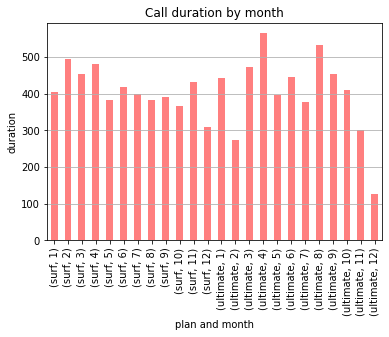

In [58]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
grouped_calls = df_merge.groupby(['plan','month'])['minutes'].mean()
grouped_calls.plot(kind='bar', alpha=0.5, color='red')
plt.ylabel('duration')
plt.xlabel('plan and month')
plt.title('Call duration by month')
plt.grid(True, axis='y')
plt.show()

As evident from the chart, the call duration exhibits variations on a monthly basis. The highest peak occurs in April for Ultimate customers and in February for Surf customers. 

Next we'll split up the dataset into different plans and then look at the distribution of call times for each plan and try to determine if there are any irregular datapoints and also determine whether users on Ultimate spend more time on phone calls than those on Surf.

In [59]:
surf_calls = df_merge.query("plan == 'surf'")
ultimate_calls = df_merge.query("plan == 'ultimate'")

In [60]:
df_merge['minutes'].describe()

count    2303.000000
mean      427.567955
std       237.549901
min         0.000000
25%       263.000000
50%       424.000000
75%       571.500000
max      1511.000000
Name: minutes, dtype: float64

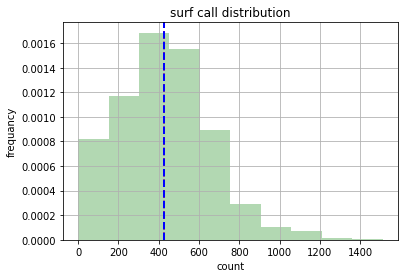

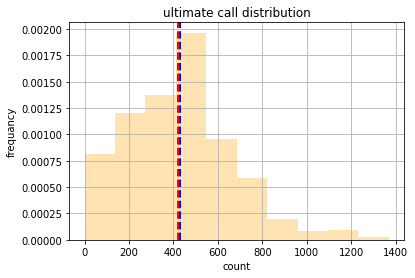

In [61]:
median_surf = np.median(surf_calls['minutes'])
median_ultimate = np.median(ultimate_calls['minutes'])
mean_surf = np.mean(surf_calls['minutes'])
mean_ultimate = np.mean(ultimate_calls['minutes'])

plt.hist(surf_calls['minutes'], bins=10, density=True, color='green', alpha=0.3)
plt.axvline(median_surf, color='red', linestyle='dashed', linewidth=2)
plt.axvline(mean_surf, color='blue', linestyle='dashed', linewidth=2)
plt.xlabel('count')
plt.ylabel('frequancy')
plt.grid(True)
plt.title('surf call distribution')
plt.show()

plt.hist(ultimate_calls['minutes'], bins=10, density=True, color='orange', alpha=0.3)
plt.axvline(median_ultimate, color='red', linestyle='dashed', linewidth=2)
plt.axvline(mean_ultimate, color='blue', linestyle='dashed', linewidth=2)
plt.xlabel('count')
plt.ylabel('frequancy')
plt.grid(True)
plt.title('ultimate call distribution')
plt.show()

Both histograms clearly indicate a right-skewed distribution of the data emphasising that call durations fall within low ranges. Furthermore, this was also revealed in the column overview as it is worth noting that 75% of the data (all plans) falls below 539 minutes. Moreover, the median and median values are close together.

This is advantageous as it reflects a more realistic pattern in our call lengths. 

In [62]:
surf_variance = np.var(surf_calls['minutes'])
ultimate_variance = np.var(ultimate_calls['minutes'])

In [63]:
print("Summary of Call Duration")
print()
print("Mean call duration for Surf customers is", mean_surf)
print("Mean call duration for Ultimate customers is", mean_ultimate)
print()
print("The variance of the call duration for Surf customers is", surf_variance)
print("The variance of the for Ultimate customers is", ultimate_variance)

Summary of Call Duration

Mean call duration for Surf customers is 427.28245725142494
Mean call duration for Ultimate customers is 428.19060773480663

The variance of the call duration for Surf customers is 55449.19950859142
The variance of the for Ultimate customers is 58490.41670736547


The mean call duration for Surf customers is 402.21 and for Ultimate customers it's slightly higher at 403.93. It's in an insignificant different for both customer groups. However, the variance indicate a wider spread of call duration amongst the Ultimate customers, implying greater diversity in the length of their calls with more calls passing to 100 minute mark as our histogram displays. All together this finding give us a good insight into the average call durations of different customer groups.

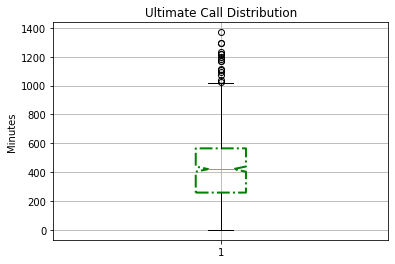

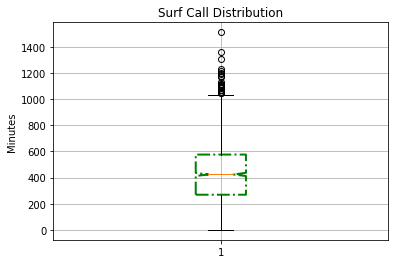

In [64]:
plt.boxplot(ultimate_calls['minutes'], notch=True, 
            boxprops=dict(linestyle='-.', linewidth=2, color='green'))
plt.grid(True)
plt.title('Ultimate Call Distribution')
plt.ylabel('Minutes')
plt.show()

plt.boxplot(surf_calls['minutes'], notch=True, 
            boxprops=dict(linestyle='-.', linewidth=2, color='green'))
plt.grid(True)
plt.title('Surf Call Distribution')
plt.ylabel('Minutes')
plt.show()

Source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html
Coloring source: https://matplotlib.org/stable/gallery/statistics/boxplot.html

To conclude, it is evident that that are more calls from the Ultimate dataset over the median threshold with customer's spending more time on the phone and having longer calls, particularly between 80 and 200 minutes. So far, in both plans no customers have maxed out their calls limit. Moreover, the Ultimate plan distribution has a higher variety than the Surf plan.

### Messages

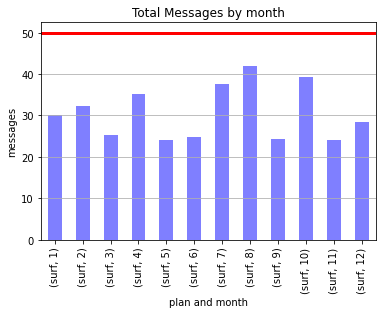

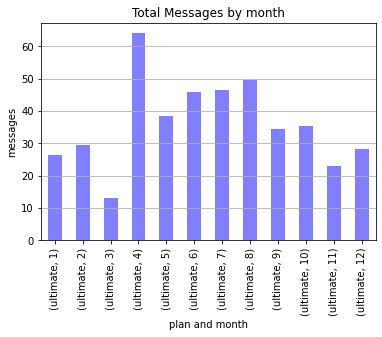

In [65]:
threshold_surf = 50
threshold_ultimate = 1000

grouped_messages = surf_calls.groupby(['plan','month'])['messages'].mean()
grouped_messages.plot(kind='bar', alpha=0.5, color='blue')
plt.axhline(y=threshold_surf,linewidth=3, color='red')
plt.ylabel('messages')
plt.xlabel('plan and month')
plt.title('Total Messages by month')
plt.grid(True, axis='y')
plt.show()

grouped_messages_ult = ultimate_calls.groupby(['plan','month'])['messages'].mean()
grouped_messages_ult.plot(kind='bar', alpha=0.5, color='blue')
# plt.axhline(y=threshold_ultimate,linewidth=3, color='red')
plt.ylabel('messages')
plt.xlabel('plan and month')
plt.title('Total Messages by month')
plt.grid(True, axis='y')
plt.show()

The charts express how customers on both plans rarely use SMS messaging and are significantly below the target, particularly for the Ultimate pack. This could be due to a variety of factors, such as internet messaging apps or social media. Next, we will look deeper at the at the distribution in two histograms to understand more about messaging.

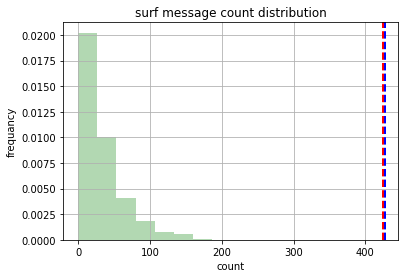

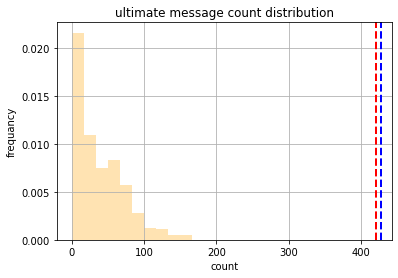

In [66]:
median_msg_surf = np.median(surf_calls['minutes'])
median_msg_ultimate = np.median(ultimate_calls['minutes'])
mean_msg_surf = np.mean(surf_calls['minutes'])
mean_msg_ultimate = np.mean(ultimate_calls['minutes'])

plt.hist(surf_calls['messages'], bins=10, density=True, color='green', alpha=0.3)
plt.axvline(median_msg_surf, color='red', linestyle='dashed', linewidth=2)
plt.axvline(mean_msg_surf, color='blue', linestyle='dashed', linewidth=2)
plt.xlabel('count')
plt.ylabel('frequancy')
plt.grid(True)
plt.title('surf message count distribution')
plt.show()

plt.hist(ultimate_calls['messages'], bins=10, density=True, color='orange', alpha=0.3)
plt.axvline(median_msg_ultimate, color='red', linestyle='dashed', linewidth=2)
plt.axvline(mean_msg_ultimate, color='blue', linestyle='dashed', linewidth=2)
plt.xlabel('count')
plt.ylabel('frequancy')
plt.grid(True)
plt.title('ultimate message count distribution')
plt.show()

As we expected from the bar chart above both histograms are skewed to the right as the majority of the values are on the lower end. Furthermore, emphasising that the number of SMS messages remain significantly below the plan threshold.

### Internet

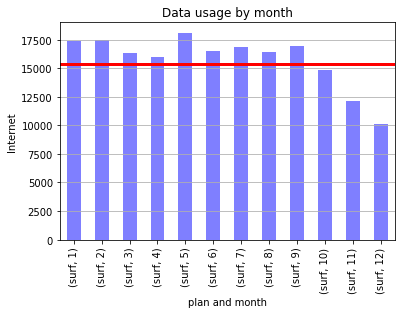

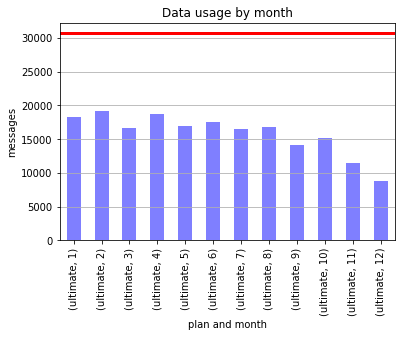

In [67]:
# Compare the amount of internet traffic consumed by users per plan
threshold_int_surf = 15360
threshold_int_ultimate = 30720

grouped_internet_surf = surf_calls.groupby(['plan','month'])['mb_used'].mean()
grouped_internet_surf.plot(kind='bar', alpha=0.5, color='blue')
plt.axhline(y=threshold_int_surf,linewidth=3, color='red')
plt.ylabel('Internet')
plt.xlabel('plan and month')
plt.title('Data usage by month')
plt.grid(True, axis='y')
plt.show()

grouped_internet_ult = ultimate_calls.groupby(['plan','month'])['mb_used'].mean()
grouped_internet_ult.plot(kind='bar', alpha=0.5, color='blue')
plt.axhline(y=threshold_int_ultimate,linewidth=3, color='red')
plt.ylabel('messages')
plt.xlabel('plan and month')
plt.title('Data usage by month')
plt.grid(True, axis='y')
plt.show()

In comparision, the mean internet usage on the Surf plan goes significantly over the threshold and the Ultimate users stay under 20,000mb. Now, we will look again at the distribution of both plans and determine exactly how much data our customers are using.

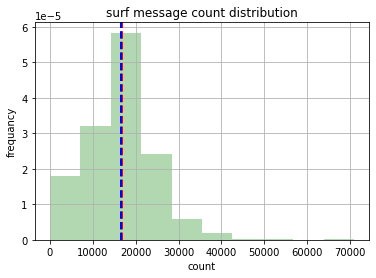

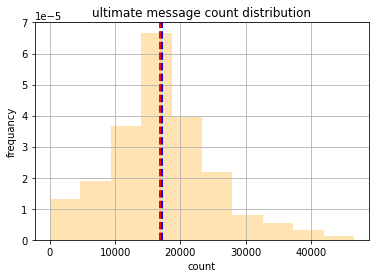

In [68]:
median_data_surf = np.median(surf_calls['mb_used'])
median_data_ultimate = np.median(ultimate_calls['mb_used'])
mean_data_surf = np.mean(surf_calls['mb_used'])
mean_data_ultimate = np.mean(ultimate_calls['mb_used'])

plt.hist(surf_calls['mb_used'], bins=10, density=True, color='green', alpha=0.3)
plt.axvline(median_data_surf, color='red', linestyle='dashed', linewidth=2)
plt.axvline(mean_data_surf, color='blue', linestyle='dashed', linewidth=2)
plt.xlabel('count')
plt.ylabel('frequancy')
plt.grid(True)
plt.title('surf message count distribution')
plt.show()

plt.hist(ultimate_calls['mb_used'], bins=10, density=True, color='orange', alpha=0.3)
plt.axvline(median_data_ultimate, color='red', linestyle='dashed', linewidth=2)
plt.axvline(mean_data_ultimate, color='blue', linestyle='dashed', linewidth=2)
plt.xlabel('count')
plt.ylabel('frequancy')
plt.grid(True)
plt.title('ultimate message count distribution')
plt.show()

In [69]:
ultimate_calls_over_data = ultimate_calls.query('mb_used > 30000')
surf_calls_over_data = surf_calls.query('mb_used > 15000')

In [70]:
ultimate_calls_over_data['mb_used'].count()

46

In [71]:
surf_calls_over_data['mb_used'].count()

950

The surf plan had the most users who breached the monthly data users with 950 people and the Ultimate users had 46 people who breached their data plan. Both histograms show right-skewed diagrams with the Ultimate being closer to symetrical.

### Revenue

Now we have understood more about the customers' behaviours, such as maintaining control over calls and text, but breaching the threshold (Surf customers) data usage. We will now look at the total monthly revenue for both plans and determine which one will be most profitable.

In [72]:
df_merge.columns

Index(['user_id', 'minutes', 'messages', 'mb_used', 'month', 'plan', 'city',
       'region', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute', 'gb_used', 'gb_inc', 'monthly_revenue'],
      dtype='object')

In [73]:
rev_grouped = pd.pivot_table(df_merge, index=['plan', 'month'], values='monthly_revenue', aggfunc='sum')
rev_grouped.columns = ['monthly_revenue']
rev_grouped

monthly_revenue
plan     month                 
surf     1          9759.081250
         2          7649.359297
         3          6358.242656
         4          7261.661094
         5          5074.130547
         6          5589.170078
         7          4164.837109
         8          3800.279844
         9          2708.650859
         10         2786.800781
         11         1452.374609
         12          662.403906
ultimate 1          9668.298828
         2          5652.739258
         3          3850.000000
         4          4970.574219
         5          5579.246094
         6          7977.299805
         7          3240.965820
         8          4394.906250
         9          2730.000000
         10         1610.000000
         11         1899.563477
         12          630.000000

Now we will begin to understand how much revenue our plans can make and visualise the trend in a line chart against the threshold with the minimum possible income per month. This is the monthly fee times by the days in the month.

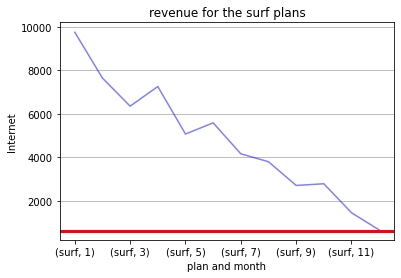

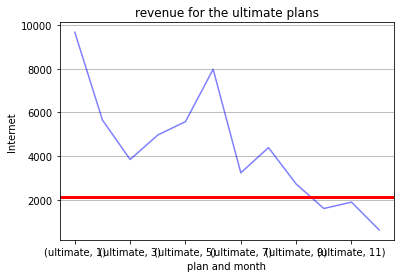

In [74]:
rev_min_surf = 20*30.4167
rev_min_ultimate = 70*30.4167

revenue_surf = surf_calls.groupby(['plan','month'])['monthly_revenue'].sum()
revenue_surf.plot(kind='line', alpha=0.5, color='blue')
plt.axhline(y=rev_min_surf,linewidth=3, color='red')
plt.ylabel('Internet')
plt.xlabel('plan and month')
plt.title('revenue for the surf plans')
plt.grid(True, axis='y')
plt.show()

revenue_ult = ultimate_calls.groupby(['plan','month'])['monthly_revenue'].sum()
revenue_ult.plot(kind='line', alpha=0.5, color='blue')
plt.axhline(y=rev_min_ultimate,linewidth=3, color='red')
plt.ylabel('Internet')
plt.xlabel('plan and month')
plt.title('revenue for the ultimate plans')
plt.grid(True, axis='y')
plt.show()

Based on the charts in total it is noticable that towards the end of the year there was a decline in revenues for both plans. This is likely due to the decline in data usage across both plans and less users going over the threshold.

However, for the majority of the year the total revenues surpass the minimum level and maintains a steady position above. However, based on the above line charts, it can be made clear that the ultimate plans bring in more revenue for the company. Furthermore, when we refer back to the customer behaviour histogram, the surf plan income tends to be heavily reliant by customers overspending on their data. 

# Test statistical hypotheses

## Testing revenue

In [75]:
null_hypothesis = "The average revenue from Ultimate and Surf plans is the same."
alternative_hypothesis = "The average revenue from Ultimate and Surf plans differs."

alpha = 0.05

results = stats.ttest_ind(surf_calls['monthly_revenue'], ultimate_calls['monthly_revenue'])

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis.')
else:
    print("We can't reject the null hypothesis.")

p-value: 1.8457599689494857e-141
We reject the null hypothesis.


<b>Printing the details from above</b>

In [76]:
print("null_hypothesis:", null_hypothesis)
print("alternative_hypothesis", alternative_hypothesis)
print("results:", results)

null_hypothesis: The average revenue from Ultimate and Surf plans is the same.
alternative_hypothesis The average revenue from Ultimate and Surf plans differs.
results: Ttest_indResult(statistic=-27.195762301382643, pvalue=1.8457599689494857e-141)


Based on the above, it is clear that the monthly revenue is signficantly different between the Ultimate and Surf plans as the probability is very low and the statistic is -15.98 suggesting that the Surf Plan is lower than the Ultimate plan.

## Testing new york/new jersey

In [77]:
df_merge['region'].unique()

array(['GA MSA', 'CA MSA', 'FL MSA', 'OH MSA', 'TN MSA', 'TX MSA',
       'PA-NJ-DE-MD MSA', 'IL-IN-WI MSA', 'NY-NJ-PA MSA', 'AL MSA',
       'OK MSA', 'CO MSA', 'WA MSA', 'NV MSA', 'IN MSA', 'SC MSA',
       'NC-SC MSA', 'AZ MSA', 'MI MSA', 'CT MSA', 'OH-KY-IN MSA',
       'VA-NC MSA', 'KY-IN MSA', 'VA MSA', 'MO-IL MSA', 'MN-WI MSA',
       'LA MSA', 'TN-MS-AR MSA', 'PA MSA', 'DC-VA-MD-WV MSA', 'UT MSA',
       'OR-WA MSA', 'MA-NH MSA', 'NE-IA MSA', 'NM MSA', 'NY MSA',
       'RI-MA MSA', 'HI MSA', 'MD MSA', 'WI MSA', 'MO-KS MSA', 'NC MSA'],
      dtype=object)

In [78]:
# Locate the monthly revenues first, before we test
ny_revenue = df_merge.loc[df_merge['region'] == 'NY-NJ-PA MSA', 'monthly_revenue']
other_revenue = df_merge.loc[df_merge['region'] != 'NY-NJ-PA MSA', 'monthly_revenue']

In [79]:
null_hypothesis = "The average revenue from New York-New Jersey MSA is different from the other regions."
alternative_hypothesis = "The average revenue from different regions doesn't differ."

alpha = 0.05

results = stats.ttest_ind(ny_revenue, other_revenue)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis.')
else:
    print("We can't reject the null hypothesis.")


p-value: 0.005679778377398988
We reject the null hypothesis.


Based on the above, we reject the null hypothesis because there isn't a significant conclusion to determine whether the revenue in the New York New Jersey Metropolitan Area is significantly different from the other regions.

## General conclusion

To conclude, we will refer back to our research objective:

"The primary objective is to evaluate how much revenue is generated by the two prepaid plans by examining key datpoints about the customers such as their preferences and communication patterns. This analysis will serve as a foundation for making data-driven decisions on advertising budget adjustments to maximize profitability."

<b>Conclusions:</b>
- Based on our customer behaviour histograms it's clear that internet usage is the key revenue driver in the Surf plan when it comes to customers overpaying on their telephone bills. In contrast, not as many customers on the Ultimate plan overused their internet package.
- From our data sample of customers per plan, the total revenue tends to drop of towards the final quarter of the year, mostly inline with a decline in datausage. This is shown in 6.0.3 when users on Surf didn't breach the threshold of their data usage plan.
- After our probability analysis it is evident that both plans have different revenue patterns and as seen in 6.0.4 the line charts portray a consistent decline from Surf throughout the year, whilst the Ultimate was more volatile with more fluctuations throughout the year.

<b>Recommendations:</b>
- Focus on internet usage as the main revenue driver, particular in the plans that are priced at the lower end. As users tend to breach their data package it would be benefical to promote new internet features and upgrades to customers on this plan.
- It is recommend to schedule promotions and upgrades towards the end of the year and during the holiday period in or to counter the declines in the revenue for this time.
- Across both plans we need to optimize revenue patterns and stabilize declines and volatility. The price structure may need evaluating for the Surf plan and the Ultimate plan can be improve through the introduction of upgrades or addons.